### Work and Health
1. Importing the data and building the data-frames
2. data exploration
    1. basic exploration
    2. statistical exploration
    3. visual exploration
3. Pre-processing
    1. Data Cleaning
    2. Outliers
    3. Missing Values
    4. Feature Engineering
    5. In-depth exploration
    6. Data transformation

<br><br>
note 1: focus on 2009 vs 2015<br>
note 2: drop hypertensive heart diseases due to low count of obs
1. geospatial analysis



### Importing the data, libraries and working on the data-frames

In [1]:
#Import the basic libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#Import the data

df_diseases = pd.read_csv('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Diseases_GHDx/IHME-GBD_2019_DATA-571888e5-1.csv')
df_employment = pd.read_csv('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Employment_WB/Employment_WB.csv')
df_health_cost = pd.read_csv('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/Health_expenditure_WB/Health_expenditure_WB.csv')
df_gpd = pd.read_csv('/Users/luisazevedo/Documents/GitHub/PfDS---Work-Health/raw data/GPD_WB/GPD_WB.csv')

In [3]:
df_diseases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168120 entries, 0 to 168119
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   measure_id     168120 non-null  int64  
 1   measure_name   168120 non-null  object 
 2   location_id    168120 non-null  int64  
 3   location_name  168120 non-null  object 
 4   sex_id         168120 non-null  int64  
 5   sex_name       168120 non-null  object 
 6   age_id         168120 non-null  int64  
 7   age_name       168120 non-null  object 
 8   cause_id       168120 non-null  int64  
 9   cause_name     168120 non-null  object 
 10  metric_id      168120 non-null  int64  
 11  metric_name    168120 non-null  object 
 12  year           168120 non-null  int64  
 13  val            168120 non-null  float64
 14  upper          168120 non-null  float64
 15  lower          168120 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 20.5+ MB


In [4]:
df_employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    3170 non-null   object
 1   Series Code    3168 non-null   object
 2   Country Name   3168 non-null   object
 3   Country Code   3168 non-null   object
 4   2000 [YR2000]  3168 non-null   object
 5   2001 [YR2001]  3168 non-null   object
 6   2002 [YR2002]  3168 non-null   object
 7   2003 [YR2003]  3168 non-null   object
 8   2004 [YR2004]  3168 non-null   object
 9   2005 [YR2005]  3168 non-null   object
 10  2006 [YR2006]  3168 non-null   object
 11  2007 [YR2007]  3168 non-null   object
 12  2008 [YR2008]  3168 non-null   object
 13  2009 [YR2009]  3168 non-null   object
 14  2010 [YR2010]  3168 non-null   object
 15  2011 [YR2011]  3168 non-null   object
 16  2012 [YR2012]  3168 non-null   object
 17  2013 [YR2013]  3168 non-null   object
 18  2014 [YR2014]  3168 non-null

In [5]:
df_health_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    530 non-null    object
 1   Series Code    528 non-null    object
 2   Country Name   528 non-null    object
 3   Country Code   528 non-null    object
 4   2000 [YR2000]  528 non-null    object
 5   2001 [YR2001]  528 non-null    object
 6   2002 [YR2002]  528 non-null    object
 7   2003 [YR2003]  528 non-null    object
 8   2004 [YR2004]  528 non-null    object
 9   2005 [YR2005]  528 non-null    object
 10  2006 [YR2006]  528 non-null    object
 11  2007 [YR2007]  528 non-null    object
 12  2008 [YR2008]  528 non-null    object
 13  2009 [YR2009]  528 non-null    object
 14  2010 [YR2010]  528 non-null    object
 15  2011 [YR2011]  528 non-null    object
 16  2012 [YR2012]  528 non-null    object
 17  2013 [YR2013]  528 non-null    object
 18  2014 [YR2014]  528 non-null   

In [6]:
df_gpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    266 non-null    object
 1   Series Code    264 non-null    object
 2   Country Name   264 non-null    object
 3   Country Code   264 non-null    object
 4   2000 [YR2000]  264 non-null    object
 5   2001 [YR2001]  264 non-null    object
 6   2002 [YR2002]  264 non-null    object
 7   2003 [YR2003]  264 non-null    object
 8   2004 [YR2004]  264 non-null    object
 9   2005 [YR2005]  264 non-null    object
 10  2006 [YR2006]  264 non-null    object
 11  2007 [YR2007]  264 non-null    object
 12  2008 [YR2008]  264 non-null    object
 13  2009 [YR2009]  264 non-null    object
 14  2010 [YR2010]  264 non-null    object
 15  2011 [YR2011]  264 non-null    object
 16  2012 [YR2012]  264 non-null    object
 17  2013 [YR2013]  264 non-null    object
 18  2014 [YR2014]  264 non-null   

### Let's first focus on a specific timestamp and explore spatial variations:
* year of 2009

In [5]:
#1. df_diseases
df_diseases.drop(columns=['measure_id','location_id','measure_name','sex_id','age_id','age_name','cause_id','metric_id'\
                         ,'upper','lower'], inplace=True)

In [6]:
#sub-divide df in df_male & df_female
df_diseases_male_2009 = df_diseases.loc[df_diseases['sex_name'].isin(['Male'])]\
.loc[df_diseases['year'] == 2009].drop(columns=['sex_name','year']).copy()

df_diseases_female_2009 = df_diseases.loc[df_diseases['sex_name'].isin(['Female'])]\
.loc[df_diseases['year'] == 2009].drop(columns=['sex_name','year']).copy()

df_diseases_male_2009

,location_name,cause_name,metric_name,val
48792,Thailand,Stroke,Number,48816.082641
48795,Thailand,Stroke,Percent,0.000238
48888,Timor-Leste,Depressive disorders,Number,9846.501557
48891,Timor-Leste,Depressive disorders,Percent,0.003370
48894,Timor-Leste,Bipolar disorder,Number,152.817030
...,...,...,...,...
166601,Romania,Headache disorders,Percent,0.023302
166976,Serbia,Headache disorders,Number,500236.745122
166979,Serbia,Headache disorders,Percent,0.024520
167250,Slovakia,Dermatitis,Number,116146.226259


In [8]:
df_diseases_male_2009_per = df_diseases_male_2009.loc[df_diseases_male_2009.metric_name == 'Percent'].copy()
df_diseases_male_2009_per.drop(columns = ['metric_name'],inplace = True)
df_diseases_male_2009_per.head()

,location_name,cause_name,val
48795,Thailand,Stroke,0.000238
48891,Timor-Leste,Depressive disorders,0.003370
48897,Timor-Leste,Bipolar disorder,0.000052
48903,Timor-Leste,Anxiety disorders,0.000837
48933,Viet Nam,Depressive disorders,0.002762


In [9]:
df_diseases_male_2009_per = df_diseases_male_2009_per.copy().pivot(index='location_name', columns = 'cause_name', values = 'val')

In [11]:
#drop column with hypertensive heart disease
df_diseases_male_2009_per.drop(columns = ['Hypertensive heart disease'], inplace=True)

In [12]:
df_diseases_male_2009_per

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
location_name,,,,,,,
Afghanistan,0.001096,0.000103,0.006387,0.007198,0.014836,0.004208,0.000145
Albania,0.000938,0.000095,0.002413,0.008636,0.023148,0.010923,0.000342
Algeria,0.001224,0.000125,0.007024,0.009523,0.018772,0.007405,0.000227
American Samoa,0.000997,0.000049,0.002983,0.008805,0.016415,0.007557,0.000252
Andorra,0.001375,0.000116,0.007009,0.006379,0.025370,0.010367,0.000209
...,...,...,...,...,...,...,...
Vanuatu,0.000934,0.000047,0.003770,0.008055,0.015376,0.006744,0.000319
Viet Nam,0.000594,0.000070,0.002762,0.011485,0.021370,0.008742,0.000413
Yemen,0.001007,0.000093,0.005559,0.006757,0.013703,0.004166,0.000140


### Basic exploration of df_diseases_male_2009_per

In [18]:
df_diseases_male_2009_per.describe()

cause_name,Anxiety disorders,Bipolar disorder,Depressive disorders,Dermatitis,Headache disorders,Musculoskeletal disorders,Stroke
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.001009,0.000101,0.005545,0.008370,0.018872,0.007071,0.000249
std,0.000226,0.000031,0.001952,0.001613,0.004209,0.002573,0.000135
min,0.000573,0.000042,0.002362,0.005015,0.010675,0.003035,0.000079
25%,0.000849,0.000083,0.004137,0.007266,0.015790,0.004719,0.000152
50%,0.000980,0.000101,0.005086,0.008442,0.017872,0.006915,0.000213
75%,0.001125,0.000122,0.006598,0.009345,0.023148,0.008932,0.000316
max,0.001787,0.000212,0.012754,0.015248,0.029951,0.014695,0.000848


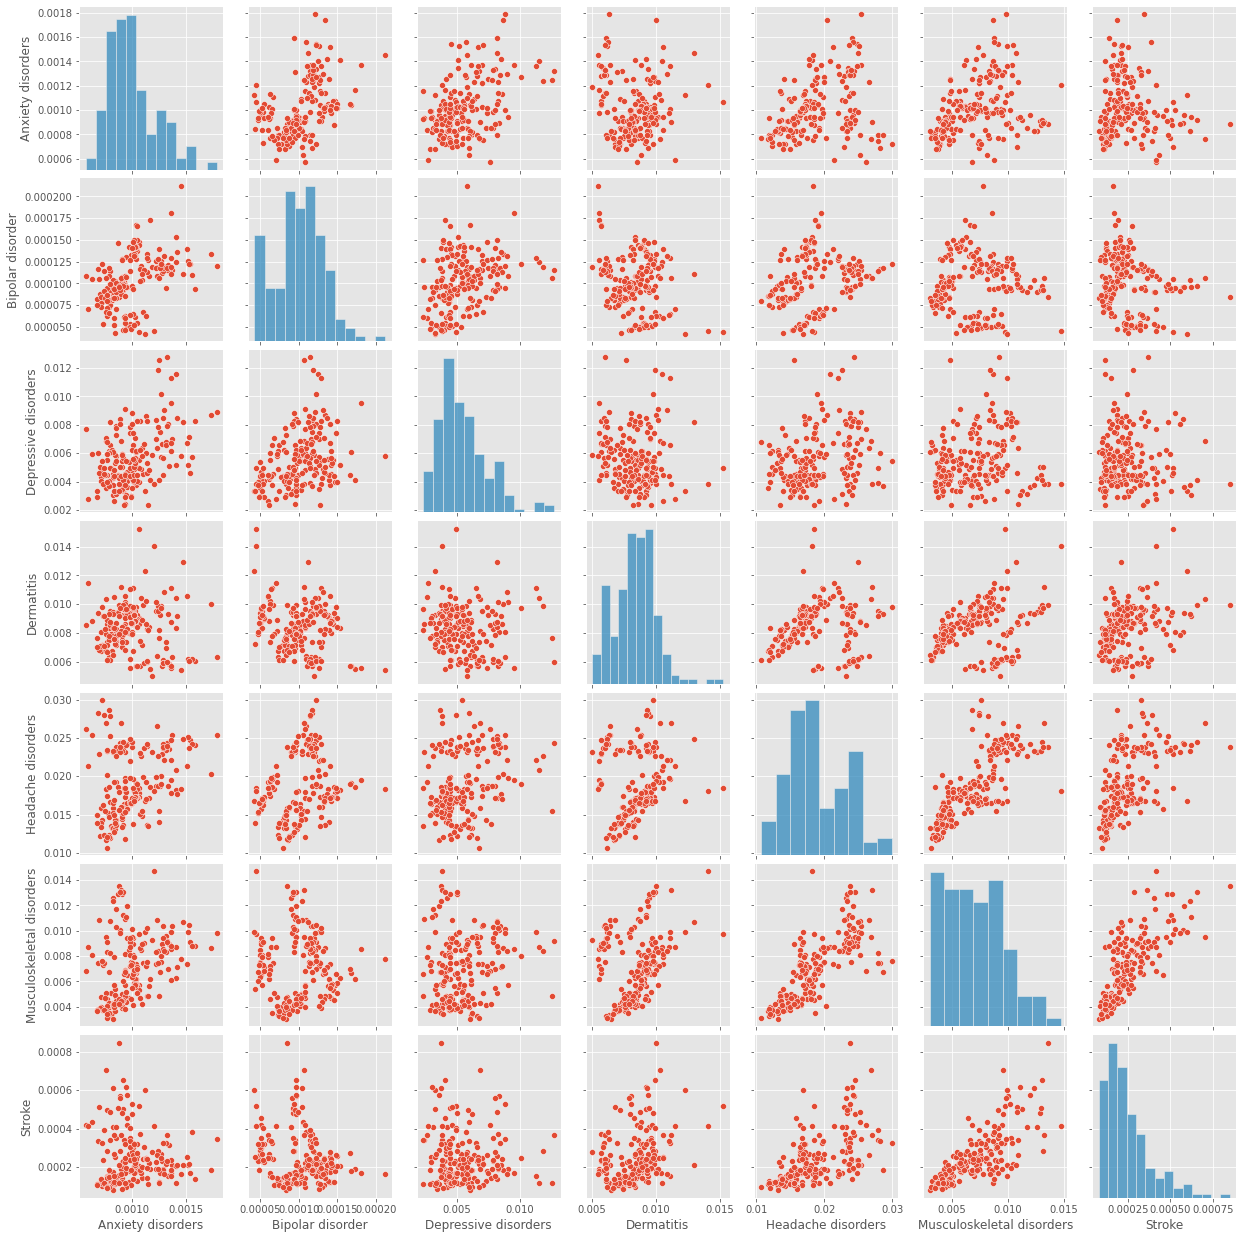

In [17]:
sns.pairplot(df_diseases_male_2009_per)
plt.show()

### df_employment

In [83]:
df_employment.head(-6)

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,"Employment in agriculture, male (% of male emp...",SL.AGR.EMPL.MA.ZS,Afghanistan,AFG,63.6500015258789,64.0199966430664,61.9700012207031,61.1500015258789,60.5099983215332,59.2999992370605,...,50.2000007629395,47.810001373291,45.8800010681152,44.0900001525879,42.2999992370605,40.6599998474121,38.3600006103516,37.2599983215332,36.5999984741211,..
1,"Employment in agriculture, male (% of male emp...",SL.AGR.EMPL.MA.ZS,Albania,ALB,44.9199981689453,42.9599990844727,41.7000007629395,40.939998626709,39.7799987792969,38.560001373291,...,38.810001373291,37.5900001525879,37.5699996948242,36.7599983215332,36.7400016784668,36.2900009155273,34.9599990844727,33.7200012207031,32.7099990844727,..
2,"Employment in agriculture, male (% of male emp...",SL.AGR.EMPL.MA.ZS,Algeria,DZA,23.7099990844727,23.0799999237061,23.2199993133545,23.3600006103516,21.8099994659424,20.1800003051758,...,12.3000001907349,12.289999961853,12.1599998474121,11.9499998092651,11.7799997329712,11.5600004196167,11.3599996566772,11.0500001907349,10.7600002288818,..
3,"Employment in agriculture, male (% of male emp...",SL.AGR.EMPL.MA.ZS,American Samoa,ASM,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,"Employment in agriculture, male (% of male emp...",SL.AGR.EMPL.MA.ZS,Andorra,AND,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,South Asia (IDA & IBRD),TSA,0.347855824742715,0.397161416547724,0.426616956943615,0.475801394698484,0.454129069485022,0.492440132785296,...,0.42368745353581,0.406092561034372,0.423326781850892,0.440096688094616,0.449968758938987,0.471129354283265,0.511999336777932,0.521612927930454,0.547423818653294,..
3163,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Sub-Saharan Africa,SSF,1.19837702799598,1.12547722523207,1.06082028342192,1.02342030603446,1.00911765267559,0.97889409903651,...,0.915315968607946,0.959498850463309,1.00024292260743,1.04786667633593,1.05065574155551,1.09838031050417,1.11845481263135,1.1178637798439,1.13048738307739,..
3164,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Sub-Saharan Africa (excluding high income),SSA,1.19885392909694,1.1257382366202,1.06089080912603,1.02260662080383,1.0091425056814,0.978918226616953,...,0.914484326186857,0.959173675037214,0.999494557132518,1.04697923641266,1.04988460522207,1.09775661716328,1.1178014388202,1.11740458240739,1.13012369458922,..
3165,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Sub-Saharan Africa (IDA & IBRD countries),TSS,1.19837702799598,1.12547722523207,1.06082028342192,1.02342030603446,1.00911765267559,0.97889409903651,...,0.915315968607946,0.959498850463309,1.00024292260743,1.04786667633593,1.05065574155551,1.09838031050417,1.11845481263135,1.1178637798439,1.13048738307739,..


In [81]:
df_employment['Series Name'].isna().sum()

3

In [82]:
df_employment['Series Name'].value_counts()

Employers, male (% of male employment) (modeled ILO estimate)                        264
Employers, female (% of female employment) (modeled ILO estimate)                    264
Employment in agriculture, male (% of male employment) (modeled ILO estimate)        264
Employment in services (% of total employment) (modeled ILO estimate)                264
Employment in industry, male (% of male employment) (modeled ILO estimate)           264
Employment in industry, female (% of female employment) (modeled ILO estimate)       264
Employment in industry (% of total employment) (modeled ILO estimate)                264
Employment in agriculture (% of total employment) (modeled ILO estimate)             264
Employers, total (% of total employment) (modeled ILO estimate)                      264
Employment in services, male (% of male employment) (modeled ILO estimate)           264
Employment in services, female (% of female employment) (modeled ILO estimate)       264
Employment in agricul